In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from scipy.special import hankel1

In [80]:
#counting integral
def I(a, b, xm, N):
    H = (b - a) / N
    X = np.zeros((N, 1))
    F = np.zeros((N, 1), dtype = np.complex)
    sum = 0
    for i in range(N):
        X[i] = (H / 2) + i * H + a
        F[i] = hankel1(0, np.abs(xm - X[i]))
        sum += F[i]
    return sum * H

In [105]:
def IterativeProcessing(N, Type):
    h = 2 * np.pi / N

    XM = np.zeros((N, 1))
    beta = np.zeros((N, 1), dtype = np.complex)
    XMJ = np.zeros((N, 1))
    for i in range(N):
        XM[i] = 0 + (h / 2) + i * h  
        XMJ[i] = 0 + i * h   
        t = I(0, 2 * np.pi, XMJ[i], N)
        beta[i] = t 
    
    
    f = np.zeros((N, 1), dtype = np.complex)
    if Type == 1:
        for i in range(N):
            f[i] = 2 / ( np.pi * 1.j) #theta = 90
    elif Type == 2:
        for i in range(N):
            f[i] = (2 * np.exp(1.j * XM[i] * np.sqrt(2) / 2)) / ( np.pi * 1.j) #theta = 45, cos(theta) = sqrt(2)/2
    else:
        for i in range(N):
            f[i] = (2 * np.exp(1.j * XM[i])) / ( np.pi * 1.j) #theta = 0, cos(theta) = 1
    
    iterCount = 101

    u = np.zeros((iterCount, N), dtype = np.complex)

    for n in range(1, iterCount):
        for i in range(N):
            intg = 0
            for j in range(N):
                intg += u[n-1, j] * hankel1(0, np.abs(XMJ[j] - XM[i]))
            intg *= h
            res = (f[i] / beta[i]) + u[n - 1, i] - (intg / beta[i])
            u[n, i] = res
            
    return XM, XMJ, u, N

In [110]:
res1 = IterativeProcessing(100, 1)
res2 = IterativeProcessing(100, 2)
res3 = IterativeProcessing(100, 3)

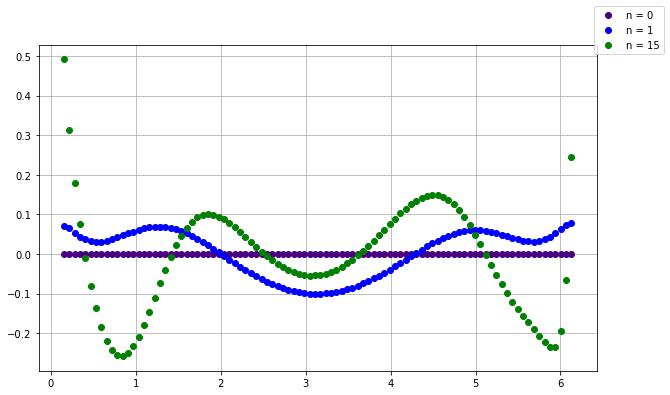

In [114]:
plt.rcParams['figure.figsize'] = [10, 6]

u1 = np.real(res1[2])
iu1 = np.imag(res1[2])

plt.plot(res1[0][2: res1[3] - 2], u1[0][2: res1[3] - 2], 'bo', color = '#4b0082', label = 'n = 0')
plt.plot(res1[0][2: res1[3] - 2], u1[3][2: res1[3] - 2], 'bo', label = 'n = 1')
plt.plot(res1[0][2: res1[3] - 2], u1[15][2: res1[3] - 2], 'bo', color = 'green', label = 'n = 15')

plt.legend(bbox_to_anchor=(1.0, 0.98),
           bbox_transform=plt.gcf().transFigure)

plt.grid()
plt.show()

In [115]:
def Drawing(XM, answer1, answer2, answer3, N):
    plt.rcParams['figure.figsize'] = [12, 6]

    #real
    res_real1 = np.real(answer1)
    plt.plot(XM[2: N - 2], res_real1[2: N - 2], 'bo', label = "theta = 90")

    res_real2 = np.real(answer2)
    plt.plot(XM[2: N - 2], res_real2[2: N - 2], 'bo', color = 'green', label = "theta = 45")

    res_real3 = np.real(answer3)
    plt.plot(XM[2: N - 2], res_real3[2: N - 2], 'bo', color = '#4b0082', label = "theta = 0")

    plt.legend(bbox_to_anchor=(1, 1.05),
               bbox_transform=plt.gcf().transFigure)

    plt.ylabel("Re j")

    plt.grid()
    plt.show()

    #imag
    res_imag1 = np.imag(answer1)
    plt.plot(XM[2: N - 2], res_imag1[2: N - 2], 'bo', label = "theta = 90")

    res_imag2 = np.imag(answer2)
    plt.plot(XM[2: N - 2], res_imag2[2: N - 2], 'bo', color = 'green', label = "theta = 45")

    res_imag3 = np.imag(answer3)
    plt.plot(XM[2: N - 2], res_imag3[2: N - 2], 'bo', color = '#4b0082', label = "theta = 0")

    plt.legend(bbox_to_anchor=(1, 1.05),
               bbox_transform=plt.gcf().transFigure)

    plt.ylabel("Im j")

    plt.grid()
    plt.show()

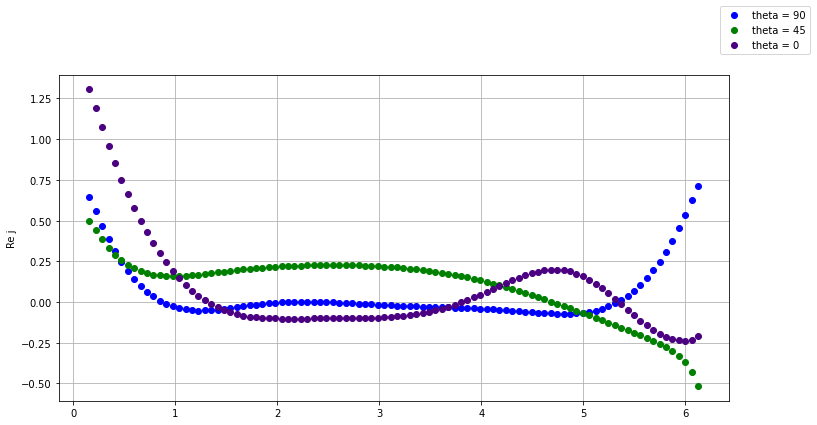

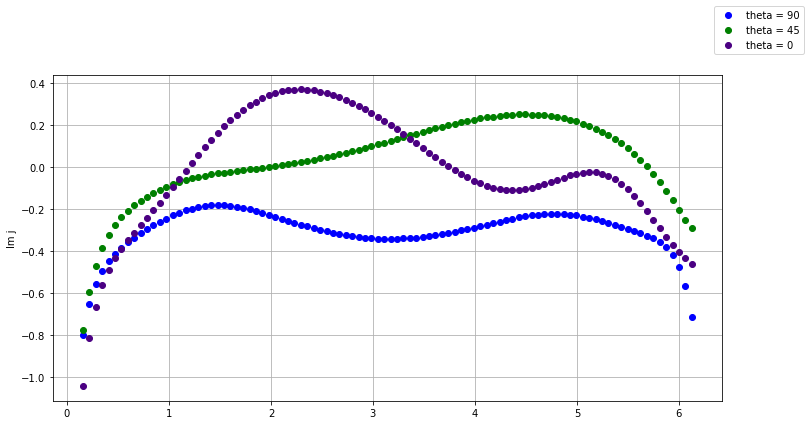

In [121]:
Drawing(res1[0], res1[2][5], res2[2][5], res3[2][5], res1[3])